In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain
from matplotlib  import cm
%matplotlib inline

In [3]:
# load analyzed comments
data = pd.DataFrame.from_csv('analyzed_ecfs_17-108_0.csv')

In [27]:
# set plotting area
fig = plt.figure()
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (9, 5)
fig.subplots_adjust(hspace=0.4, wspace=.25)

In [4]:
data.head()

,address_line_1,address_line_2,city,date_received,date_submission,email,email_confirmation,express_comment,first_name,international_address,...,zip5,breach,status_code,p,n,pm,cluster_id,silscore,mean_sil_score,stance
0,5188 Manor Brook Rd NW,,Rochester,2017-04-27T21:00:08.554Z,2017-04-27T21:00:08.554Z,perfusionman@gmail.com,NaN,1,Zachary,NaN,...,55901,"[{""Title"":""Bitcoin Security Forum Gmail Dump"",...",200,0.666667,10,0.545455,7,-0.003787,-0.080023,1
1,2720 Old Smith Springs Rd,,Nashville,2017-04-27T21:08:51.347Z,2017-04-27T21:08:51.347Z,eheinz1985@fmail.com,True,1,Eric,NaN,...,37217,NaN,404,0.866667,13,0.530973,22,-0.093833,-0.045570,1
2,NaN,NaN,NaN,2017-04-27T21:00:13.988Z,2017-04-27T21:00:13.988Z,hectoryusel@gmail.com,True,0,Hector,AV. EUGENIO GARZA SADA 2501 SUR COL. TECNOLÓGI...,...,NaN,NaN,404,0.533333,8,0.555556,36,0.006943,-0.016729,1
3,NaN,,Red Bank,2017-04-27T21:15:26.504Z,2017-04-27T21:15:26.504Z,jrtisdale@live.com,NaN,1,Justin,NaN,...,37343,NaN,404,0.733333,11,0.540541,40,-0.200759,-0.178778,1
4,Albemarle Rd,,Brooklyn,2017-04-27T21:58:48.883Z,2017-04-27T21:58:48.883Z,rlofl@yahoo.com,NaN,1,J,NaN,...,11226,"[{""Title"":""8tracks"",""Name"":""8tracks"",""Domain"":...",200,0.600000,9,0.550459,9,-0.087290,-0.132421,1


(array([  127.,   663.,  1403.,   333.,   306.,    58.,  1043.,  4202.,
          119.,  1743.]),
 array([  0. ,   4.9,   9.8,  14.7,  19.6,  24.5,  29.4,  34.3,  39.2,
         44.1,  49. ]),
 <a list of 10 Patch objects>)

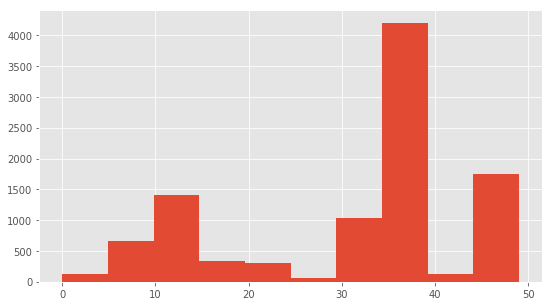

In [5]:
plt.hist(data['cluster_id'])

Text(0,0.5,'Cluster ID')

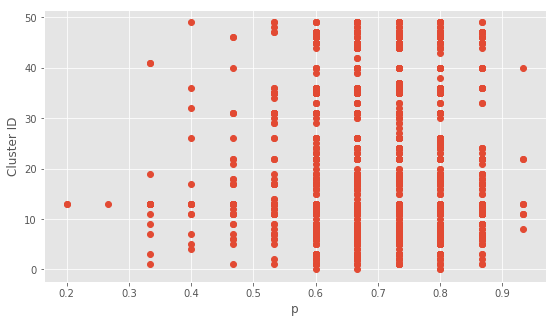

In [6]:
plt.plot(data['p'], data['cluster_id'], 'o')
plt.xlabel('p')
plt.ylabel('Cluster ID')

This tells us that the more "spammy" comments very few clusters compared to the less "spammy" ones. Since these metrics were independent, it tells us that our model works well.  

Text(0,0.5,'cluster mean silhouette score')

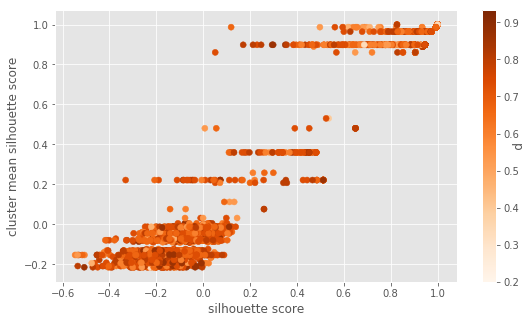

In [7]:
plot = plt.scatter(data['silscore'], data['mean_sil_score'], c = data['p'], cmap = cm.Oranges, marker = 'o')
cbar = plt.colorbar(plot)
cbar.set_label('p', rotation=270)
plt.xlabel('silhouette score')
plt.ylabel('cluster mean silhouette score')

Text(0,0.5,'cluster mean silhouette score')

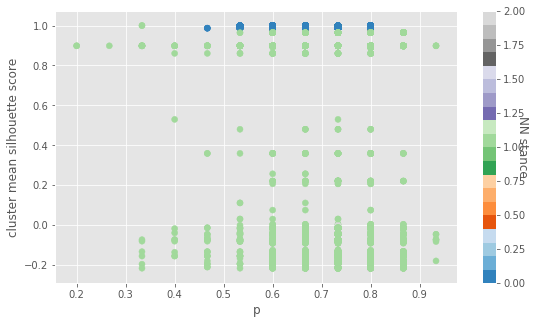

In [8]:
plot = plt.scatter(data['p'], data['mean_sil_score'], c = data['stance'], cmap = cm.tab20c, marker = 'o')
cbar = plt.colorbar(plot)
cbar.set_label('NN stance', rotation=270)
plt.xlabel('p')
plt.ylabel('cluster mean silhouette score')

The above plot shows us that the anti-NN comments are well-clustered, confirming other studies' results and our hypthothesis about p.

Text(0,0.5,'cluster mean silhouette score')

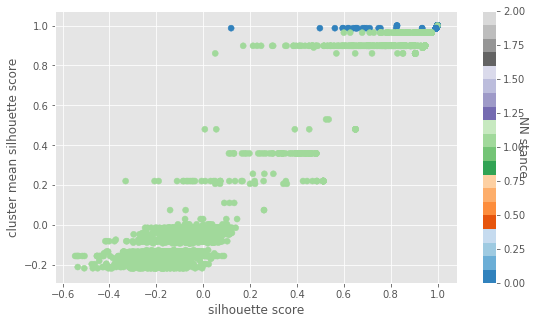

In [9]:
plot = plt.scatter(data['silscore'], data['mean_sil_score'], c = data['stance'], cmap = cm.tab20c, marker = 'o')
cbar = plt.colorbar(plot)
cbar.set_label('NN stance', rotation=270)
plt.xlabel('silhouette score')
plt.ylabel('cluster mean silhouette score')

Text(0,0.5,'Cluster ID')

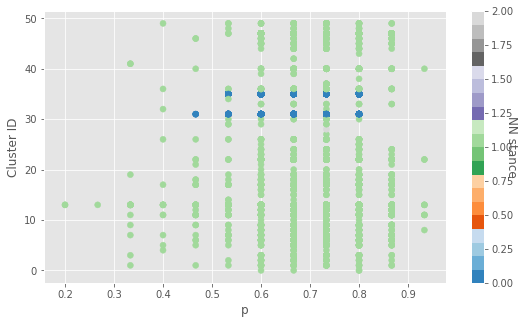

In [10]:
plot = plt.scatter(data['p'], data['cluster_id'], c = data['stance'], cmap = cm.tab20c, marker = 'o')
cbar = plt.colorbar(plot)
cbar.set_label('NN stance', rotation=270)
plt.xlabel('p')
plt.ylabel('Cluster ID')

Text(0,0.5,'Cluster ID')

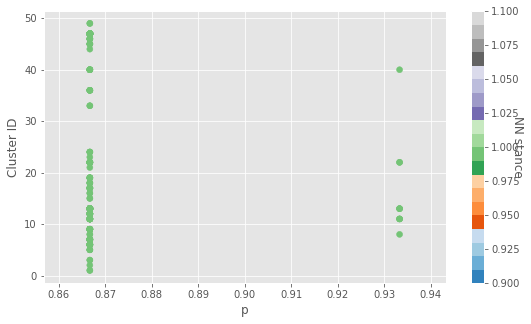

In [11]:
# let's see the stance of those with p > 0.8 
plot = plt.scatter(data['p'][data['p'] > 0.8], data['cluster_id'][data['p'] > 0.8], 
            c = data['stance'][data['p'] > 0.8], cmap = cm.tab20c, marker = 'o')
cbar = plt.colorbar(plot)
cbar.set_label('NN stance', rotation=270)
plt.xlabel('p')
plt.ylabel('Cluster ID')

They all seem to be pro-NN, which corroborates Kao's study. 